In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix

In [189]:
# Load dataset
df = pd.read_csv('Hb_data.csv')

In [191]:
df

,Name,Age,Weight,Category,Hb,Anemia Condition
0,Person_1,74,68.3,Child,13.2,Normal
1,Person_2,18,80.4,Male,11.2,Mild
2,Person_3,22,85.7,Pregnant Woman,6.5,Severe
3,Person_4,71,98.1,Pregnant Woman,10.1,Mild
4,Person_5,68,16.1,Child,0.8,Severe
...,...,...,...,...,...,...
995,Person_996,71,63.1,Pregnant Woman,7.7,Moderate
996,Person_997,63,86.6,Female,12.3,Normal
997,Person_998,12,96.0,Pregnant Woman,13.1,Normal
998,Person_999,51,88.6,Male,0.9,Severe


In [193]:
# Display first few rows
df.head()

,Name,Age,Weight,Category,Hb,Anemia Condition
0,Person_1,74,68.3,Child,13.2,Normal
1,Person_2,18,80.4,Male,11.2,Mild
2,Person_3,22,85.7,Pregnant Woman,6.5,Severe
3,Person_4,71,98.1,Pregnant Woman,10.1,Mild
4,Person_5,68,16.1,Child,0.8,Severe


In [195]:
# Encode categorical variables (Gender)
df['Category'] = df['Category'].map({'Male': 0, 'Female': 1, 'Child': 2, 'Pregnant Woman': 3})

In [197]:
df.isnull().sum()

Name                0
Age                 0
Weight              0
Category            0
Hb                  0
Anemia Condition    0
dtype: int64

In [199]:
df.columns

Index(['Name', 'Age', 'Weight', 'Category', 'Hb', 'Anemia Condition'], dtype='object')

In [201]:
# Split dataset into features and target variable
X = df[['Name', 'Age', 'Weight', 'Category','Hb']]
y = df['Anemia Condition']

In [203]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
# Check for non-numeric columns
print(X_train.dtypes)
# Remove 'Name' column if it exists
if 'Name' in X_train.columns:
    X_train = X_train.drop(columns=['Name'])
# Convert categorical columns to numeric
from sklearn.preprocessing import LabelEncoder
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

Name         object
Age           int64
Weight      float64
Category      int64
Hb          float64
dtype: object


RandomForestClassifier(random_state=42)

In [207]:
# Ensure X_test has the same features as X_train
X_test = X_test[X_train.columns]

# Make predictions
y_pred = model.predict(X_test)

In [209]:
y_pred

array(['Moderate', 'Mild', 'Severe', 'Normal', 'Moderate', 'Severe',
       'Mild', 'Severe', 'Severe', 'Mild', 'Severe', 'Mild', 'Normal',
       'Normal', 'Moderate', 'Mild', 'Mild', 'Severe', 'Normal', 'Normal',
       'Severe', 'Moderate', 'Severe', 'Normal', 'Moderate', 'Normal',
       'Moderate', 'Severe', 'Normal', 'Moderate', 'Severe', 'Moderate',
       'Mild', 'Moderate', 'Moderate', 'Moderate', 'Normal', 'Mild',
       'Normal', 'Severe', 'Severe', 'Moderate', 'Severe', 'Severe',
       'Normal', 'Moderate', 'Normal', 'Severe', 'Mild', 'Severe',
       'Normal', 'Moderate', 'Severe', 'Severe', 'Severe', 'Normal',
       'Mild', 'Moderate', 'Mild', 'Moderate', 'Moderate', 'Normal',
       'Moderate', 'Moderate', 'Mild', 'Moderate', 'Severe', 'Moderate',
       'Moderate', 'Mild', 'Severe', 'Severe', 'Normal', 'Normal',
       'Normal', 'Moderate', 'Normal', 'Normal', 'Normal', 'Severe',
       'Mild', 'Moderate', 'Moderate', 'Moderate', 'Normal', 'Normal',
       'Severe', '

In [211]:
import joblib
joblib.dump(model,'anemia_detector.pkl')

['anemia_detector.pkl']

In [213]:
health = joblib.load('anemia_detector.pkl')

In [215]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
from sklearn.metrics import classification_report
from tabulate import tabulate

# Generate the classification report dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df = pd.DataFrame(report).transpose()
df.to_excel("classification_report.xlsx", index=True)
print("Table saved as 'classification_report.xlsx'. Open it in Excel, copy the table, and paste it into Word.")

print(df.to_markdown())


Model Accuracy: 98.50%
Table saved as 'classification_report.xlsx'. Open it in Excel, copy the table, and paste it into Word.
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| Mild         |    0.979592 | 1        |   0.989691 |    48     |
| Moderate     |    0.967742 | 1        |   0.983607 |    60     |
| Normal       |    1        | 0.975    |   0.987342 |    40     |
| Severe       |    1        | 0.961538 |   0.980392 |    52     |
| accuracy     |    0.985    | 0.985    |   0.985    |     0.985 |
| macro avg    |    0.986833 | 0.984135 |   0.985258 |   200     |
| weighted avg |    0.985425 | 0.985    |   0.984978 |   200     |


In [217]:
# Preventive measures based on anemia severity
def get_preventive_measures(anemia_type):
    measures = {
        0: "✅ Maintain a balanced diet rich in iron, vitamin B12, and folic acid.\n✅ Stay hydrated and get regular checkups.\n✅ Exercise to improve circulation and oxygen transport.\n💊 Allopathy: Not required, but Ferrous Sulfate (325mg) can be taken if needed.\n🌿 Ayurveda: Chyawanprash daily and Triphala churna for better iron absorption.\n🍃 Naturopathy: Beetroot & carrot juice, morning sun exposure for Vitamin D.\n🏡 Homeopathy: Ferrum Phosphoricum 6X, a mild iron supplement.",     
        1: "⚠️ Increase intake of iron-rich foods (spinach, lentils, red meat).\n⚠️ Take vitamin C-rich foods (oranges, lemons, amla) to enhance iron absorption.\n⚠️ Avoid tea/coffee immediately after meals, as they reduce iron absorption.\n💊 Allopathy: Ferrous Sulfate tablets, Vitamin C supplements for better absorption.\n🌿 Ayurveda: Ashwagandha, Guduchi, and dates with jaggery.\n🍃 Naturopathy: Pomegranate or wheatgrass juice, deep breathing exercises.\n🏡 Homeopathy: Natrum Muriaticum 30C (useful for chronic anemia).",
        2: "⚠️ Consult a doctor for further evaluation.\n⚠️ Include iron, vitamin B12, and folate supplements if recommended.\n⚠️ Monitor your blood tests and avoid excessive alcohol consumption.\n💊 Allopathy: Ferrous Fumarate, Folic Acid, Vitamin B12 injections (Cyanocobalamin).\n🌿 Ayurveda: Punarnava Mandur tablets, Pomegranate juice daily.\n🍃 Naturopathy: Green smoothies (spinach, kale, moringa), nettle leaf tea.\n🏡 Homeopathy: China Officinalis 30C (for anemia due to blood loss).",
        3: "🚨 Seek immediate medical attention.\n🚨 You may need specialized treatment like transfusions or medications.\n🚨 Maintain a high-protein, iron-rich diet with doctor supervision.\n💊 Allopathy: Iron Sucrose IV infusion, Erythropoietin injections.\n🌿 Ayurveda: Draksharishta (grape-based iron tonic), Mandoor Bhasma.\n🍃 Naturopathy: Fresh Aloe Vera juice, Beetroot juice therapy.\n🏡 Homeopathy: Ferrum Metallicum 30C (for severe weakness and pallor)."
    }
    return measures.get(anemia_type, "No information available")

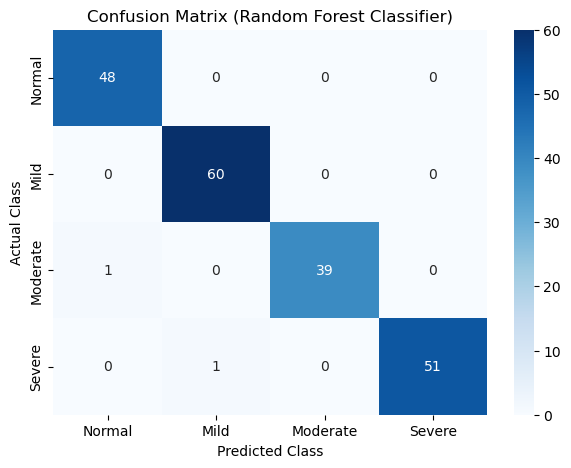

In [219]:
# Class name mapping
class_names = ["Normal", "Mild", "Moderate", "Severe"]

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert to DataFrame for labeled axis
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot confusion matrix with labels
plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")

# Save as PNG file
plt.savefig("Confusion_Matrix_RF.png", dpi=300, bbox_inches='tight')

plt.show()